#IPL WEB SCRAPING PRJECT USING BEAUTIFULSOUP

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import libraries for web scrapping
from bs4 import BeautifulSoup
import requests

In [3]:
url = "https://www.iplt20.com/auction"
response = requests.get(url)
data = response.text
soup = BeautifulSoup(data,'html.parser')

In [5]:
# Find all the urls
auction_years_lis = soup.find('ul', {'class':'year-auction nav'}).find_all('li')
urls = []
for li in auction_years_lis:
    urls.append(li.find('a').get('href'))
print(urls)
print(len(urls))

['https://www.iplt20.com/auction/2024', 'https://www.iplt20.com/auction/2023', 'https://www.iplt20.com/auction/2022', 'https://www.iplt20.com/auction/2021', 'https://www.iplt20.com/auction/2020', 'https://www.iplt20.com/auction/2019', 'https://www.iplt20.com/auction/2018', 'https://www.iplt20.com/auction/2017', 'https://www.iplt20.com/auction/2016', 'https://www.iplt20.com/auction/2015', 'https://www.iplt20.com/auction/2014', 'https://www.iplt20.com/auction/2013']
12


In [51]:
players = {} # Dict to store each record
no_of_players = 0
for url in urls:
    season = url.split('/')[-1]
    print('Season: ', season)
    response = requests.get(url)
    data = response.text
    season_soup = BeautifulSoup(data,'html.parser')
    ipl_teams = season_soup.find_all('section', {'class':'ih-points-table-sec'})
    for team in ipl_teams:
        #no_of_teams = no_of_teams + 1
        team_name = team.find('h2').text
        print(team_name)
        print("Details: ")
        team_details = team.find('table')
        team_tr = team_details.find_all('tr')
        for tr in team_tr[1:]:
            no_of_players = no_of_players + 1
            print("No: ", no_of_players)
            player_details = tr.text
            name = player_details.split('\n')[1]
            nationality = player_details.split('\n')[2]
            player_type = player_details.split('\n')[3]
            player_price = player_details.split('\n')[4]
            print("name: ", name)
            print("nationality: ", nationality)
            print("player_type: ", player_type)
            print("player_price: ", player_price)
            players[no_of_players] = [season, name,nationality,player_type, team_name,player_price]

print(players)
print(len(players))
print(no_of_players)

Streaming output truncated to the last 5000 lines.
player_price:  50,00,000 
No:  74
name:  Bhagath Varma 
nationality:  Indian 
player_type:  All-Rounder 
player_price:  20,00,000 
No:  75
name:  Kyle Jamieson 
nationality:  Overseas 
player_type:  Bowler 
player_price:  1,00,00,000 
No:  76
name:  Ajay Mandal 
nationality:  Indian 
player_type:  All-Rounder 
player_price:  20,00,000 
No:  77
name:  Nishant Sindhu 
nationality:  Indian 
player_type:  All-Rounder 
player_price:  60,00,000 
No:  78
name:  Shaik Rasheed 
nationality:  Indian 
player_type:  Batter 
player_price:  20,00,000 
No:  79
name:  Ben Stokes 
nationality:  Overseas 
player_type:  All-Rounder 
player_price:  16,25,00,000 
 Delhi Capitals
Details: 
No:  80
name:  Phil Salt 
nationality:  Overseas 
player_type:  Wicket-Keeper 
player_price:  2,00,00,000 
No:  81
name:  Ishant Sharma 
nationality:  Indian 
player_type:  Bowler 
player_price:  50,00,000 
No:  82
name:  Rilee Rossouw 
nationality:  Overseas 
player_type

In [9]:
# write the dict to csv file
ipl_players_df = pd.DataFrame.from_dict(players, orient = 'index', columns = ['Season', 'Name','Nationality','Type','Team','Price'])

ipl_players_df.head()

ipl_players_df.to_csv('IPL_players_2013_24.csv') # write to CSV file

In [53]:
ipl_players_df.head()

,Season,Name,Nationality,Type,Team,Price
1,2024,Avanish Rao Aravelly,Indian,Wicket-Keeper,CSK,2000000
2,2024,Mustafizur Rahman,Overseas,Bowler,CSK,20000000
3,2024,Daryl Mitchell,Overseas,All-Rounder,CSK,140000000
4,2024,Sameer Rizvi,Indian,Batter,CSK,84000000
5,2024,Rachin Ravindra,Overseas,All-Rounder,CSK,18000000


In [56]:
ipl_players_df.sample(5)

,Season,Name,Nationality,Type,Team,Price
320,2022,Harshal Patel,Indian,All-Rounder,RCB,107500000
849,2015,Darren Sammy,All-Rounder,"2,80,00,000",RCB,
218,2022,Sam Billings,Overseas,Wicket Keeper,KKR,20000000
221,2022,Sheldon Jackson,Indian,Wicket Keeper,KKR,6000000
441,2020,Jaydev Unadkat,Bowler,"3,00,00,000",RR,


In [57]:
ipl_players_df.shape

(1037, 6)

In [13]:
ipl_players_df.isnull().sum()

Season         0
Name           0
Nationality    0
Type           0
Team           0
Price          0
dtype: int64

In [58]:
ipl_players_df.duplicated().sum()

0

In [59]:
ipl_players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 1 to 1037
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       1037 non-null   int64 
 1   Name         1037 non-null   object
 2   Nationality  1037 non-null   object
 3   Type         1037 non-null   object
 4   Team         1037 non-null   object
 5   Price        1037 non-null   object
dtypes: int64(1), object(5)
memory usage: 56.7+ KB


In [60]:
ipl_players_df.describe()

,Season
count,1037.000000
mean,2018.834137
std,3.377113
min,2013.000000
25%,2016.000000
50%,2019.000000
75%,2022.000000
max,2024.000000


In [61]:
ipl_players_df.dtypes

Season          int64
Name           object
Nationality    object
Type           object
Team           object
Price          object
dtype: object

In [24]:
#Season should be numeric
ipl_players_df['Season'] = ipl_players_df['Season'].astype(int)

In [ ]:
type(ipl_players_df['Season'])

In [27]:
ipl_players_df['Season'].dtype

dtype('int64')

In [28]:
#Remove , from Price column
ipl_players_df['Price'] = ipl_players_df['Price'].replace(',', '',regex=True)

In [29]:
ipl_players_df['Price'].dtype

dtype('O')

In [62]:
ipl_players_df.head()

,Season,Name,Nationality,Type,Team,Price
1,2024,Avanish Rao Aravelly,Indian,Wicket-Keeper,CSK,2000000
2,2024,Mustafizur Rahman,Overseas,Bowler,CSK,20000000
3,2024,Daryl Mitchell,Overseas,All-Rounder,CSK,140000000
4,2024,Sameer Rizvi,Indian,Batter,CSK,84000000
5,2024,Rachin Ravindra,Overseas,All-Rounder,CSK,18000000


In [50]:
ipl_players_df

,Season,Name,Nationality,Type,Team,Price
1,2024,Avanish Rao Aravelly,Indian,Wicket-Keeper,CSK,2000000
2,2024,Mustafizur Rahman,Overseas,Bowler,CSK,20000000
3,2024,Daryl Mitchell,Overseas,All-Rounder,CSK,140000000
4,2024,Sameer Rizvi,Indian,Batter,CSK,84000000
5,2024,Rachin Ravindra,Overseas,All-Rounder,CSK,18000000
...,...,...,...,...,...,...
1033,2013,Darren Sammy,All-Rounder,"425,000",SRH,
1034,2013,Sudeep Tyagi,Bowler,"100,000",SRH,
1035,2013,Clinton McKay,Bowler,"100,000",SRH,
1036,2013,Nathan McCullum,Bowler,"100,000",SRH,


In [46]:
teams

array([' Chennai Super Kings', ' Delhi Capitals', ' Gujarat Titans',
       ' Kolkata Knight Riders', ' Lucknow Super Giants',
       ' Mumbai Indians', ' Punjab Kings', ' Rajasthan Royals',
       ' Royal Challengers Bengaluru', ' Sunrisers Hyderabad',
       ' Royal Challengers Bangalore', ' Kings XI Punjab',
       'Kings XI Punjab', 'Delhi Daredevils', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Mumbai Indians',
       'Rising Pune Supergiant', 'Rajasthan Royals',
       'Pune Warriors India'], dtype=object)

In [47]:
# Create a dictionary to standardize team names
team_dict = {
    ' Chennai Super Kings' : 'CSK',
    ' Delhi Capitals' : 'DC',
    ' Gujarat Titans' : 'GT',
    ' Kolkata Knight Riders' : 'KKR',
    ' Lucknow Super Giants' : 'LSG',
    ' Mumbai Indians' : 'MI',
    ' Punjab Kings' : 'KXIP',
    ' Rajasthan Royals' : 'RR',
    ' Royal Challengers Bengaluru' : 'RCB',
    ' Sunrisers Hyderabad' : 'SRH',
    ' Royal Challengers Bangalore' : 'RCB',
    ' Kings XI Punjab' : 'KXIP',
    'Kings XI Punjab' : 'KXIP',
    'Delhi Daredevils' : 'DD',
    'Gujarat Lions' : 'GL',
    'Kolkata Knight Riders' : 'KKR',
    'Mumbai Indians' : 'MI',
    'Rising Pune Supergiant' : 'RPS',
    'Rajasthan Royals' : 'RR',
    'Pune Warriors India' : 'PWI'
}

# Replace inconsistent team names using the dictionary
ipl_players_df['Team'] = ipl_players_df['Team'].replace(team_dict)

In [48]:
ipl_players_df['Team']

1       CSK
2       CSK
3       CSK
4       CSK
5       CSK
       ... 
1033    SRH
1034    SRH
1035    SRH
1036    SRH
1037    SRH
Name: Team, Length: 1037, dtype: object

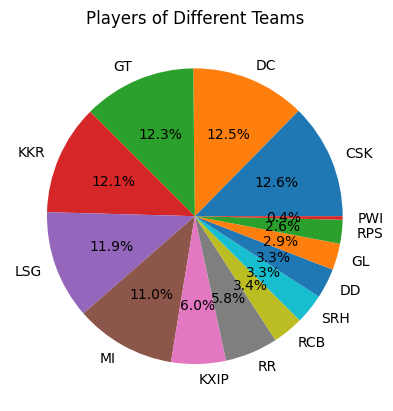

In [49]:
import matplotlib.pyplot as plt

# Get the unique team names
teams = ipl_players_df['Team'].unique()

# Calculate the number of players for each team
team_counts = ipl_players_df['Team'].value_counts()

# Create a pie chart
plt.pie(team_counts, labels=teams, autopct='%1.1f%%')

# Set the title and display the plot
plt.title('Players of Different Teams')
plt.show()

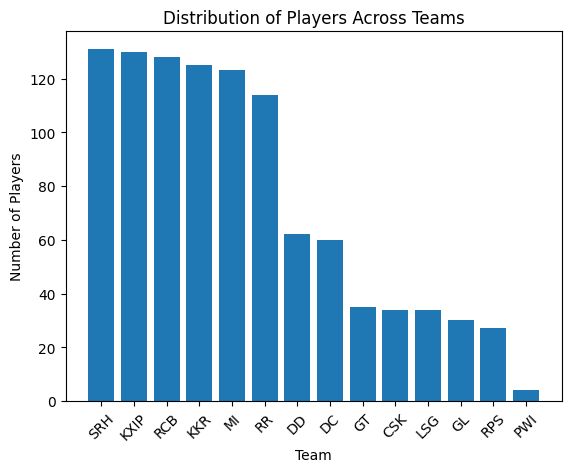

In [63]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(team_counts.index, team_counts.values)

# Set the title and labels
plt.title('Distribution of Players Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Players')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [69]:
df = pd.read_csv('IPL_players_2013_24.csv', index_col=None)

In [70]:
df

,Unnamed: 0,Season,Name,Nationality,Type,Team,Price
0,1,2024,Avanish Rao Aravelly,Indian,Wicket-Keeper,CSK,2000000.0
1,2,2024,Mustafizur Rahman,Overseas,Bowler,CSK,20000000.0
2,3,2024,Daryl Mitchell,Overseas,All-Rounder,CSK,140000000.0
3,4,2024,Sameer Rizvi,Indian,Batter,CSK,84000000.0
4,5,2024,Rachin Ravindra,Overseas,All-Rounder,CSK,18000000.0
...,...,...,...,...,...,...,...
1032,1033,2013,Darren Sammy,All-Rounder,"425,000",SRH,NaN
1033,1034,2013,Sudeep Tyagi,Bowler,"100,000",SRH,NaN
1034,1035,2013,Clinton McKay,Bowler,"100,000",SRH,NaN
1035,1036,2013,Nathan McCullum,Bowler,"100,000",SRH,NaN


In [71]:
# remove its first column

df.drop(columns=['Unnamed: 0'], inplace=True)


In [72]:
df

,Season,Name,Nationality,Type,Team,Price
0,2024,Avanish Rao Aravelly,Indian,Wicket-Keeper,CSK,2000000.0
1,2024,Mustafizur Rahman,Overseas,Bowler,CSK,20000000.0
2,2024,Daryl Mitchell,Overseas,All-Rounder,CSK,140000000.0
3,2024,Sameer Rizvi,Indian,Batter,CSK,84000000.0
4,2024,Rachin Ravindra,Overseas,All-Rounder,CSK,18000000.0
...,...,...,...,...,...,...
1032,2013,Darren Sammy,All-Rounder,"425,000",SRH,NaN
1033,2013,Sudeep Tyagi,Bowler,"100,000",SRH,NaN
1034,2013,Clinton McKay,Bowler,"100,000",SRH,NaN
1035,2013,Nathan McCullum,Bowler,"100,000",SRH,NaN


In [73]:
df.isnull().sum()

Season           0
Name             0
Nationality      0
Type             0
Team             0
Price          681
dtype: int64